<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/13_recommender_systems/1_one_hot_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

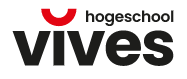<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



## One-hot encoding

### Uitleg

Omzetten van **categorische variabelen** naar numerieke waarden:
- **ordinaal** (volgorde):
  - bv. test scores {A, B, C, D, E, F}
  - worden integers {5, 4, 3, 2, 1, 0}
  - OK want volgorde blijft
- **nominaal** (geen volgorde):
  - bv. klassen {kat, hond, konijn}
  - worden integers {0, 1, 2}
  - niet ok, want 2 > 1 > 0, en volgorde mag niet!

Mogelijke oplossing is **one-hot encoding** toepassen:
- klassen {kat, hond, konijn}
- worden omgezet naar {100, 010, 001}



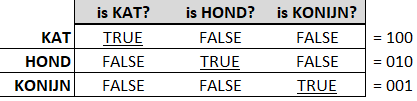

**ONE-HOT ENCODING:**
- TRANSFORMATIE van nominale data
- tijdens de PREPROCESSING fase
- om performantie van algoritmes te verhogen
- = DUMMY variabelen in de statistiek

**HOE?**
- stel: K klassen
- klassen nummeren van 0 t.e.m. K-1
- klasse i:
  - array met allemaal nullen
  - uitgezonderd: i-de element = 1


**ONE-COLD ENCODING** bestaat ook:
- idem als one-hot enconding, maar nullen worden enen en één wordt nul
- klasse i:
  - array met allemaal enen
  - uitgezonderd: i-de element = 0

### Zelf coderen

Schrijf een functie `one_hot_encoder()` die één klasse uit een lijst van K klassen omzet volgens one-hot encoding

In [1]:
import numpy as np

def one_hot_encoder(value, values):
    # value is the class value
    # values is the list of class values
    # returns numpy array with the one-hot code of the given value
    k = len(values)
    i = values.index(value)
    c = np.zeros(k)
    c[i] = 1
    return c

Test uit op `['kat', 'hond', 'konijn']`:

In [2]:
from random import shuffle

classes = ['kat', 'hond', 'konijn']
values = classes.copy()
shuffle(values)

for value in values:
    print(value, one_hot_encoder(value, classes), sep='\t')

konijn	[0. 0. 1.]
kat	[1. 0. 0.]
hond	[0. 1. 0.]


Schrijf ook een functie `one_cold_encoder()` die één klasse uit een lijst van K klassen omzet volgens one-cold encoding

In [3]:
def one_cold_encoder(value, values):
    # value is the class value
    # values is the list of class values
    # returns numpy array with the one-cold code of the given value
    k = len(values)
    i = values.index(value)
    c = np.ones(k)
    c[i] = 0
    return c

Test uit op `['appel', 'peer', 'banaan', 'kers', 'kiwi']`:

In [4]:
classes = ['appel', 'peer', 'banaan', 'kers', 'kiwi']
values = classes.copy()
shuffle(values)

for value in values:
    print(value, one_cold_encoder(value, classes), sep='\t')

kiwi	[1. 1. 1. 1. 0.]
peer	[1. 0. 1. 1. 1.]
banaan	[1. 1. 0. 1. 1.]
kers	[1. 1. 1. 0. 1.]
appel	[0. 1. 1. 1. 1.]


### Pandas

Pandas heeft een functie `get_dummies()`:

In [5]:
import pandas as pd

df = pd.DataFrame({'naam':  ['Jan', 'Piet', 'Joris', 'Korneel', 'Jos'],
                   'fruit': ['banaan', 'appel', 'peer', 'appel', 'banaan']})
df

,naam,fruit
0,Jan,banaan
1,Piet,appel
2,Joris,peer
3,Korneel,appel
4,Jos,banaan


In [6]:
pd.get_dummies(df, columns=['fruit'], prefix='', prefix_sep='')  # prefix=None zal prefix 'fruit_' toevoegen aan de kolomnamen

,naam,appel,banaan,peer
0,Jan,False,True,False
1,Piet,True,False,False
2,Joris,False,False,True
3,Korneel,True,False,False
4,Jos,False,True,False


### Scikit-Learn

Scikit-Learn heeft de klassen `OneHotEncoder` en `LabelBinarizer` in module `preprocessing`:

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [8]:
encoder = OneHotEncoder()
c = encoder.fit_transform(df[['fruit']])  # input moet 2D zijn, daarom dubbele vierkante haakjes!
c.toarray()  # output c is sparse matrix -> omzetten naar numpy array

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [9]:
LabelBinarizer().fit_transform(df.fruit)  # gebruik maken van chaining ipv LabelBinarizer object aan variabele toekennen

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

### `mlxtend`

In het topic over association rule learning zullen we gebruik maken van de Python machine learning library `mlxtend`: http://rasbt.github.io/mlxtend/.

Library `mlxtend` heeft een functie `one_hot()`, maar die accepteert enkel een list of array met integers als input:

In [10]:
from mlxtend.preprocessing import one_hot

Eerst de klassen omzetten naar integers mbv klasse `LabelEncoder` van `sklearn.preprocessing`:

In [11]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(df.fruit.values)
y

array([1, 0, 2, 0, 1])

In [12]:
one_hot(y)  # default dtype is float

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Omzetten naar one-cold:

In [13]:
(~one_hot(y, dtype=bool)).astype(int)

array([[1, 0, 1],
       [0, 1, 1],
       [1, 1, 0],
       [0, 1, 1],
       [1, 0, 1]])

## Scikit-Learn Encoders

We hebben in de cursus al verschillende manieren gezien om categorische variabelen te transformeren, maar wat is nu het verschil tussen al die verschillende encoders in Scikit-Learn?

- `OrdinalEncoder`
- `OneHotEncoder`
- `LabelEncoder`
- `LabelBinarizer`

Laten we deze klassen eerst eens importeren vanuit de module `preprocessing`:

In [16]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, LabelBinarizer

Volgens de [Scikit-Learn documentatie](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) moeten de eerste twee gebruikt worden voor features `X`.

De `OrdinalEncoder` is in principe bedoeld voor ordinale variabelen, wat betekent dat de volgorde belangrijk is. Die volgorde kan je ook meegeven bij het instantiëren van de klasse.

We definiëren een variabele of feature 'temperature' als voorbeeld met drie categorieën: cold, warm en hot:

In [21]:
df = pd.DataFrame(dict(temperature=['hot', 'cold', 'warm', 'hot', 'warm', 'cold']))
df

,temperature
0,hot
1,cold
2,warm
3,hot
4,warm
5,cold


Via inputparameter `categories` kunnen we de volgorde vastleggen:

In [23]:
OrdinalEncoder(categories=[['cold', 'warm', 'hot']]).fit_transform(df)

array([[2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.]])

We zien inderdaad dat cold wordt afgebeeld op 0, warm op 1, en hot op 2.

Als de variabele niet ordinaal maar nominaal is, dan kunnen we beter de `OneHotEncoder` gebruiken:

In [26]:
OneHotEncoder(categories=[['cold', 'warm', 'hot']]).fit_transform(df).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

Ook hier hebben we de volgorde opgegeven via `categories`, en daar houdt de `fit` methode wel rekening mee, maar bij one-hot encoding speelt die volgorde dus geen rol.

Volgens de [Scikit-Learn documentatie](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets) moeten de twee laatste klassen gebruikt worden om de labels in een target om te zetten.

De `LabelEncoder` kan gezien worden als het equivalent van de `OrdinalEncoder`, maar dus bedoeld voor labels. Dat betekent dat er slechts 1 kolom `y` wordt doorgegeven, die liefst een 1D vector is.

In [29]:
LabelEncoder().fit_transform(df['temperature'])  # df['temperature'] is 1D series!

array([1, 0, 2, 1, 2, 0])

De volgorde speelt hier geen rol!

De `LabelBinarizer` is tenslotte het equivalent van de `OneHotEncoder`, maar dan bedoeld voor een target vector `y`:

In [30]:
LabelBinarizer().fit_transform(df['temperature'])  # df['temperature'] is 1D series!

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

Hier speelt de volgorde sowieso geen enkele rol.

Is het een ramp wanneer je nu de `OneHotEncoder` gebruikt om een multi-class target `y` om te zetten? Uiteraard niet, maar weet dat het eigenlijk niet de bedoeling is...

### Voorbeeld

We creëren een Pandas DataFrame met 10 samples en 4 variabelen die we random genereren:

- vak: programming, machine learning, deep learning
- taal: java, python, R, C#   
- niveau: graduaat, bachelor, master
- gevorderd: ja, nee

Stel nu dat we het label van variabele "gevorderd" willen voorspellen aan de hand van de andere drie variabelen.

Features "vak" en "taal" zijn nominaal, het "niveau" is ordinaal waarbij de rangschikking als volgt is: master > bachelor > graduaat.

We definiëren een feature matrix `X` en een target vector `y`. We passen hierbij de juiste encoding toe door gebruik te maken van de juiste Scikit-Learn klassen.

In [38]:
vak = ['programming', 'machine learning', 'deep learning']
taal = ['java', 'python', 'R', 'C#']
niveau = ['graduaat', 'bachelor', 'master']
gevorderd = ['ja', 'nee']

n_samples = 10
np.random.seed(0)
df = pd.DataFrame(dict(vak=np.random.choice(vak, size=n_samples),
                       taal=np.random.choice(taal, size=n_samples),
                       niveau=np.random.choice(niveau, size=n_samples),
                       gevorderd=np.random.choice(gevorderd, size=n_samples)))
df

,vak,taal,niveau,gevorderd
0,programming,java,bachelor,nee
1,machine learning,R,bachelor,ja
2,programming,python,graduaat,nee
3,machine learning,R,bachelor,nee
4,machine learning,C#,graduaat,nee
5,deep learning,C#,graduaat,nee
6,programming,R,bachelor,nee
7,deep learning,java,master,ja
8,programming,python,graduaat,nee
9,programming,python,master,ja


In [40]:
X = np.hstack((
    OneHotEncoder().fit_transform(df[['vak', 'taal']]).toarray(),
    OrdinalEncoder(categories=[niveau]).fit_transform(df[['niveau']])  # df[['niveau']] is 2D!
))
X

array([[0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 2.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1., 2.]])

In [41]:
y = LabelEncoder().fit_transform(df.gevorderd)  # df.gevorderd is 1D!
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

---